# Compas: Results ver

## Libraries and stuff

In [1]:
import os
import json
import yaml
import random
import time
import functools
import pickle
import re
import orjson
import alibi
import ignite
import copy

from IPython import display
from itertools import combinations, product
from tqdm import tqdm
from matplotlib import pyplot as plt
from collections import Counter

import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optimizer

import fatf.utils.data.datasets as fatf_datasets
import fatf.fairness.data.measures as fatf_dfm
import fatf.utils.data.tools as fatf_data_tools

from river import rules, tree, datasets, drift, metrics, evaluate
from river import imblearn
from river import preprocessing
from river import optim
from river import metrics
from river import feature_extraction, feature_selection
from river import ensemble, linear_model, forest, compose

from torchsummary import summary
from torch.utils.data import TensorDataset, DataLoader

from ignite.metrics import Accuracy, Loss
from ignite.engine import Engine, Events, create_supervised_trainer, create_supervised_evaluator
from ignite.handlers import EarlyStopping, ModelCheckpoint
from ignite.contrib.handlers import global_step_from_engine


from xailib.models.sklearn_classifier_wrapper import sklearn_classifier_wrapper

from alibi.explainers.cfproto import CounterFactualProto

from bridget_utils import *
from classes import BetaUser, DeferralNet, PyTorchWrapper, RiverModelWrapper, PriorityManager
from b_xai_test import BRIDGET, HiC, MiC


c:\Users\virgm\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


26-Feb-19 13:00:20 fatf.utils.array.tools INFO     Using numpy's numpy.lib.recfunctions.structured_to_unstructured as fatf.utils.array.tools.structured_to_unstructured and fatf.utils.array.tools.structured_to_unstructured_row.


In [2]:
%load_ext autoreload
%autoreload 2

## Expert: Accurate, Trusting

### Iter 1

In [3]:
iter = 1

#### HiC

##### Accuracy, F1

In [4]:
accuracies= pd.read_csv(fr".\HIC_res\compas\iter_{iter}\results_accurate_trusting\HIC_DRIFT_User_accurate_trusting_ARFAccuracy.txt", sep=" ", header=None, names=["index", "accuracy"])
f1= pd.read_csv(fr"HIC_res\compas\iter_{iter}\results_accurate_trusting\HIC_DRIFT_User_accurate_trusting_ARFF1.txt", sep=" ", header=None, names=["index", "f1"])

In [5]:
acc_mean= accuracies["accuracy"].mean()
f1_mean= f1["f1"].mean()

print(f"Accuracy: {acc_mean}, F1 score: {f1_mean}")

Accuracy: 0.6128815063812404, F1 score: 0.5440465559632333


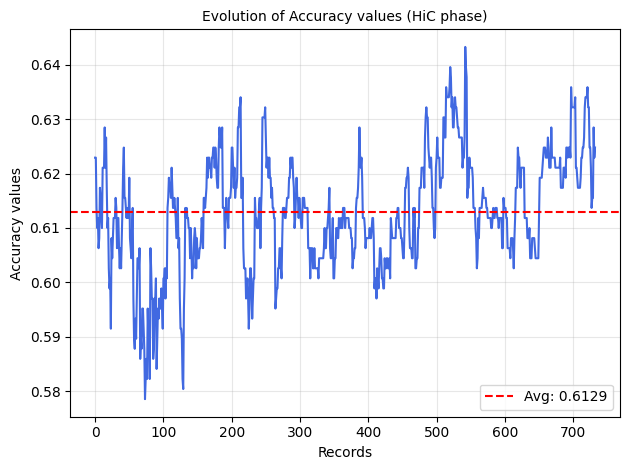

In [6]:
plt.plot(accuracies["index"], accuracies["accuracy"], linestyle='-', color='royalblue')

plt.title('Evolution of Accuracy values (HiC phase)', fontsize=10)
plt.axhline(y= acc_mean, color='red', linestyle='--', label=f'Avg: {acc_mean:.4f}')
plt.xlabel('Records', fontsize=10)
plt.ylabel('Accuracy values', fontsize=10)

plt.legend(loc= 'lower right')
plt.grid(True, alpha=0.3)  
plt.tight_layout()
plt.show()


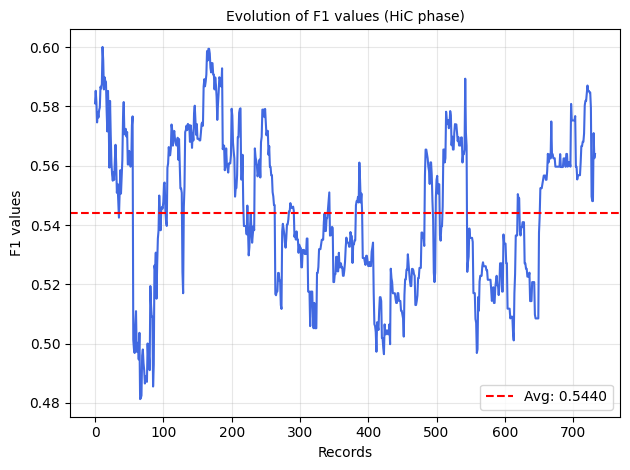

In [7]:
plt.plot(f1["index"], f1["f1"], linestyle='-', color='royalblue')

plt.title('Evolution of F1 values (HiC phase)', fontsize=10)
plt.axhline(y= f1_mean, color='red', linestyle='--', label=f'Avg: {f1_mean:.4f}')
plt.xlabel('Records', fontsize=10)
plt.ylabel('F1 values', fontsize=10)

plt.legend(loc= 'lower right')
plt.grid(True, alpha=0.3)  
plt.tight_layout()
plt.show()


##### FEA, Machine Confidence

In [8]:
mach_confidence = pd.read_csv(fr"HIC_res\compas\iter_{iter}\results_accurate_trusting\HIC_DRIFT_User_accurate_trusting_ARFMachine_Confidence.txt", sep=" ", header=None, names=["index", "confidence"])
user_fea= pd.read_csv(fr".\HIC_res\compas\iter_{iter}\results_accurate_trusting\HIC_DRIFT_User_accurate_trusting_ARFHiC_FEA_user.txt", sep=" ", header=None, names=["index", "user_fea"])
machine_fea= pd.read_csv(fr".\HIC_res\compas\iter_{iter}\results_accurate_trusting\HIC_DRIFT_User_accurate_trusting_ARFHiC_FEA_machine.txt", sep=" ", header=None, names=["index", "machine_fea"])

In [9]:
mean_confidence = mach_confidence["confidence"].mean()
mean_user_fea = user_fea["user_fea"].mean()
mean_machine_fea = machine_fea["machine_fea"].mean()

print(f"Mean Machine Confidence: {mean_confidence}")
print(f"Mean User FEA: {mean_user_fea}")
print(f"Mean Machine FEA: {mean_machine_fea}")

Mean Machine Confidence: 0.6709774392548904
Mean User FEA: 0.9430825567733885
Mean Machine FEA: 0.6031874488111334


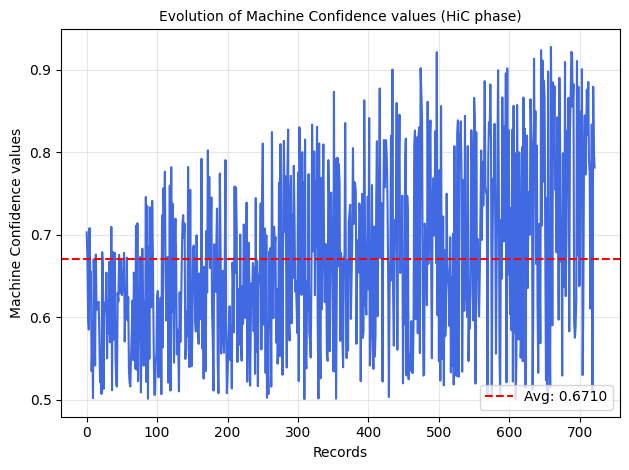

In [10]:
plt.plot(mach_confidence["index"], mach_confidence["confidence"], linestyle='-', color='royalblue')

plt.title('Evolution of Machine Confidence values (HiC phase)', fontsize=10)
plt.axhline(y= mean_confidence, color='red', linestyle='--', label=f'Avg: {mean_confidence:.4f}')
plt.xlabel('Records', fontsize=10)
plt.ylabel('Machine Confidence values', fontsize=10)

plt.legend(loc= 'lower right')
plt.grid(True, alpha=0.3)  
plt.tight_layout()
plt.show()


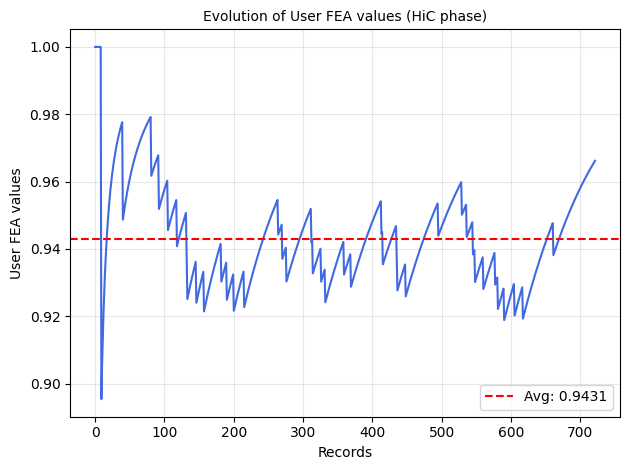

In [11]:
plt.plot(user_fea["index"], user_fea["user_fea"], linestyle='-', color='royalblue')

plt.title('Evolution of User FEA values (HiC phase)', fontsize=10)
plt.axhline(y= mean_user_fea, color='red', linestyle='--', label=f'Avg: {mean_user_fea:.4f}')
plt.xlabel('Records', fontsize=10)
plt.ylabel('User FEA values', fontsize=10)

plt.legend(loc= 'lower right')
plt.grid(True, alpha=0.3)  
plt.tight_layout()
plt.show()


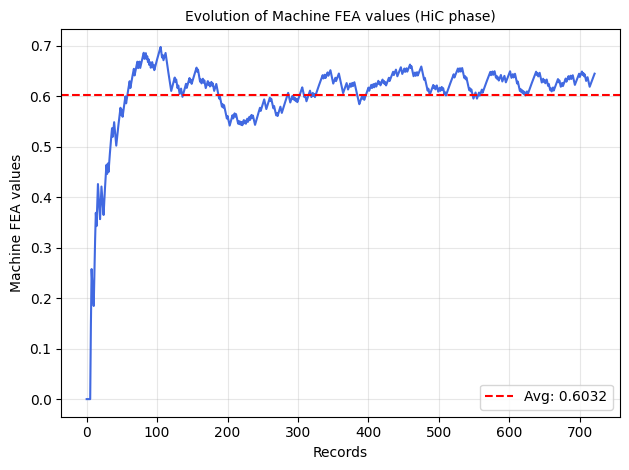

In [12]:
plt.plot(machine_fea["index"], machine_fea["machine_fea"], linestyle='-', color='royalblue')

plt.title('Evolution of Machine FEA values (HiC phase)', fontsize=10)
plt.axhline(y= mean_machine_fea, color='red', linestyle='--', label=f'Avg: {mean_machine_fea:.4f}')
plt.xlabel('Records', fontsize=10)
plt.ylabel('Machine FEA values', fontsize=10)

plt.legend(loc= 'lower right')
plt.grid(True, alpha=0.3)  
plt.tight_layout()
plt.show()


##### KNN metrics

#### MiC Confidence Strat

In [ ]:
mic_accuracies= pd.read_csv(fr".\HIC_res\compas\iter_{iter}\results_accurate_trusting\HIC_DRIFT_User_accurate_trusting_ARFAccuracy.txt", sep=" ", header=None, names=["index", "accuracy"])
mic_f1= pd.read_csv(fr"HIC_res\compas\iter_{iter}\results_accurate_trusting\HIC_DRIFT_User_accurate_trusting_ARFF1.txt", sep=" ", header=None, names=["index", "f1"])

### Iter 2

In [ ]:
iter = 2

#### HiC

##### Accuracy, F1

In [ ]:
accuracies= pd.read_csv(fr".\HIC_res\compas\iter_{iter}\results_accurate_trusting\HIC_DRIFT_User_accurate_trusting_ARFAccuracy.txt", sep=" ", header=None, names=["index", "accuracy"])
f1= pd.read_csv(fr"HIC_res\compas\iter_{iter}\results_accurate_trusting\HIC_DRIFT_User_accurate_trusting_ARFF1.txt", sep=" ", header=None, names=["index", "f1"])

In [ ]:
acc_mean= accuracies["accuracy"].mean()
f1_mean= f1["f1"].mean()

print(f"Accuracy: {acc_mean}, F1 score: {f1_mean}")

In [ ]:
plt.plot(accuracies["index"], accuracies["accuracy"], linestyle='-', color='royalblue')

plt.title('Evolution of Accuracy values (HiC phase)', fontsize=10)
plt.axhline(y= acc_mean, color='red', linestyle='--', label=f'Avg: {acc_mean:.4f}')
plt.xlabel('Records', fontsize=10)
plt.ylabel('Accuracy values', fontsize=10)

plt.legend(loc= 'lower right')
plt.grid(True, alpha=0.3)  
plt.tight_layout()
plt.show()


In [ ]:
plt.plot(f1["index"], f1["f1"], linestyle='-', color='royalblue')

plt.title('Evolution of F1 values (HiC phase)', fontsize=10)
plt.axhline(y= f1_mean, color='red', linestyle='--', label=f'Avg: {f1_mean:.4f}')
plt.xlabel('Records', fontsize=10)
plt.ylabel('F1 values', fontsize=10)

plt.legend(loc= 'lower right')
plt.grid(True, alpha=0.3)  
plt.tight_layout()
plt.show()


##### FEA, Machine Confidence

In [ ]:
mach_confidence = pd.read_csv(fr"HIC_res\compas\iter_{iter}\results_accurate_trusting\HIC_DRIFT_User_accurate_trusting_ARFMachine_Confidence.txt", sep=" ", header=None, names=["index", "confidence"])
user_fea= pd.read_csv(fr".\HIC_res\compas\iter_{iter}\results_accurate_trusting\HIC_DRIFT_User_accurate_trusting_ARFHiC_FEA_user.txt", sep=" ", header=None, names=["index", "user_fea"])
machine_fea= pd.read_csv(fr".\HIC_res\compas\iter_{iter}\results_accurate_trusting\HIC_DRIFT_User_accurate_trusting_ARFHiC_FEA_machine.txt", sep=" ", header=None, names=["index", "machine_fea"])

In [ ]:
mean_confidence = mach_confidence["confidence"].mean()
mean_user_fea = user_fea["user_fea"].mean()
mean_machine_fea = machine_fea["machine_fea"].mean()

print(f"Mean Machine Confidence: {mean_confidence}")
print(f"Mean User FEA: {mean_user_fea}")
print(f"Mean Machine FEA: {mean_machine_fea}")

In [ ]:
plt.plot(mach_confidence["index"], mach_confidence["confidence"], linestyle='-', color='royalblue')

plt.title('Evolution of Machine Confidence values (HiC phase)', fontsize=10)
plt.axhline(y= mean_confidence, color='red', linestyle='--', label=f'Avg: {mean_confidence:.4f}')
plt.xlabel('Records', fontsize=10)
plt.ylabel('Machine Confidence values', fontsize=10)

plt.legend(loc= 'lower right')
plt.grid(True, alpha=0.3)  
plt.tight_layout()
plt.show()


In [ ]:
plt.plot(user_fea["index"], user_fea["user_fea"], linestyle='-', color='royalblue')

plt.title('Evolution of User FEA values (HiC phase)', fontsize=10)
plt.axhline(y= mean_user_fea, color='red', linestyle='--', label=f'Avg: {mean_user_fea:.4f}')
plt.xlabel('Records', fontsize=10)
plt.ylabel('User FEA values', fontsize=10)

plt.legend(loc= 'lower right')
plt.grid(True, alpha=0.3)  
plt.tight_layout()
plt.show()


In [ ]:
plt.plot(machine_fea["index"], machine_fea["machine_fea"], linestyle='-', color='royalblue')

plt.title('Evolution of Machine FEA values (HiC phase)', fontsize=10)
plt.axhline(y= mean_machine_fea, color='red', linestyle='--', label=f'Avg: {mean_machine_fea:.4f}')
plt.xlabel('Records', fontsize=10)
plt.ylabel('Machine FEA values', fontsize=10)

plt.legend(loc= 'lower right')
plt.grid(True, alpha=0.3)  
plt.tight_layout()
plt.show()


##### KNN metrics

#### MiC

### Iter 3

In [ ]:
iter = 3

#### HiC

##### Accuracy, F1

In [ ]:
accuracies= pd.read_csv(fr".\HIC_res\compas\iter_{iter}\results_accurate_trusting\HIC_DRIFT_User_accurate_trusting_ARFAccuracy.txt", sep=" ", header=None, names=["index", "accuracy"])
f1= pd.read_csv(fr"HIC_res\compas\iter_{iter}\results_accurate_trusting\HIC_DRIFT_User_accurate_trusting_ARFF1.txt", sep=" ", header=None, names=["index", "f1"])

In [ ]:
acc_mean= accuracies["accuracy"].mean()
f1_mean= f1["f1"].mean()

print(f"Accuracy: {acc_mean}, F1 score: {f1_mean}")

In [ ]:
plt.plot(accuracies["index"], accuracies["accuracy"], linestyle='-', color='royalblue')

plt.title('Evolution of Accuracy values (HiC phase)', fontsize=10)
plt.axhline(y= acc_mean, color='red', linestyle='--', label=f'Avg: {acc_mean:.4f}')
plt.xlabel('Records', fontsize=10)
plt.ylabel('Accuracy values', fontsize=10)

plt.legend(loc= 'lower right')
plt.grid(True, alpha=0.3)  
plt.tight_layout()
plt.show()


In [ ]:
plt.plot(f1["index"], f1["f1"], linestyle='-', color='royalblue')

plt.title('Evolution of F1 values (HiC phase)', fontsize=10)
plt.axhline(y= f1_mean, color='red', linestyle='--', label=f'Avg: {f1_mean:.4f}')
plt.xlabel('Records', fontsize=10)
plt.ylabel('F1 values', fontsize=10)

plt.legend(loc= 'lower right')
plt.grid(True, alpha=0.3)  
plt.tight_layout()
plt.show()


##### FEA, Machine Confidence

In [ ]:
mach_confidence = pd.read_csv(fr"HIC_res\compas\iter_{iter}\results_accurate_trusting\HIC_DRIFT_User_accurate_trusting_ARFMachine_Confidence.txt", sep=" ", header=None, names=["index", "confidence"])
user_fea= pd.read_csv(fr".\HIC_res\compas\iter_{iter}\results_accurate_trusting\HIC_DRIFT_User_accurate_trusting_ARFHiC_FEA_user.txt", sep=" ", header=None, names=["index", "user_fea"])
machine_fea= pd.read_csv(fr".\HIC_res\compas\iter_{iter}\results_accurate_trusting\HIC_DRIFT_User_accurate_trusting_ARFHiC_FEA_machine.txt", sep=" ", header=None, names=["index", "machine_fea"])

In [ ]:
mean_confidence = mach_confidence["confidence"].mean()
mean_user_fea = user_fea["user_fea"].mean()
mean_machine_fea = machine_fea["machine_fea"].mean()

print(f"Mean Machine Confidence: {mean_confidence}")
print(f"Mean User FEA: {mean_user_fea}")
print(f"Mean Machine FEA: {mean_machine_fea}")

In [ ]:
plt.plot(mach_confidence["index"], mach_confidence["confidence"], linestyle='-', color='royalblue')

plt.title('Evolution of Machine Confidence values (HiC phase)', fontsize=10)
plt.axhline(y= mean_confidence, color='red', linestyle='--', label=f'Avg: {mean_confidence:.4f}')
plt.xlabel('Records', fontsize=10)
plt.ylabel('Machine Confidence values', fontsize=10)

plt.legend(loc= 'lower right')
plt.grid(True, alpha=0.3)  
plt.tight_layout()
plt.show()


In [ ]:
plt.plot(user_fea["index"], user_fea["user_fea"], linestyle='-', color='royalblue')

plt.title('Evolution of User FEA values (HiC phase)', fontsize=10)
plt.axhline(y= mean_user_fea, color='red', linestyle='--', label=f'Avg: {mean_user_fea:.4f}')
plt.xlabel('Records', fontsize=10)
plt.ylabel('User FEA values', fontsize=10)

plt.legend(loc= 'lower right')
plt.grid(True, alpha=0.3)  
plt.tight_layout()
plt.show()


In [ ]:
plt.plot(machine_fea["index"], machine_fea["machine_fea"], linestyle='-', color='royalblue')

plt.title('Evolution of Machine FEA values (HiC phase)', fontsize=10)
plt.axhline(y= mean_machine_fea, color='red', linestyle='--', label=f'Avg: {mean_machine_fea:.4f}')
plt.xlabel('Records', fontsize=10)
plt.ylabel('Machine FEA values', fontsize=10)

plt.legend(loc= 'lower right')
plt.grid(True, alpha=0.3)  
plt.tight_layout()
plt.show()


##### KNN metrics

#### MiC